In [1]:
#"I (We) certify that the code and data in this assignment were generated independently,
#using only the tools and resources defined in the course and that I (we) did not receive
#any external help, coaching or contributions during the production of this work.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv(r"datasets\insurance.csv")

In [123]:
data = pd.DataFrame(df)

In [124]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [125]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [126]:
data.shape

(1338, 7)

In [127]:
data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
no_null_df = df.dropna()

In [129]:
no_null_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
no_null_df.shape

(1338, 7)

In [131]:
c1 = df['region'] = df.region.astype('category')
c2 = df['sex'] = df.sex.astype('category')
c3 = df['smoker'] = df.smoker.astype('category')

In [132]:
print(c1)
print(" ")
print(c2)
print(" ")
print(c3)

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: category
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
 
0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: category
Categories (2, object): ['female', 'male']
 
0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes']


In [133]:
d1 = pd.concat([c1, c2, c3,], axis = 1)

In [134]:
df['Region'] = pd.factorize(df.region)[0]

In [135]:
df['Sex'] = pd.factorize(df.sex)[0]

In [136]:
df['Smoker'] = pd.factorize(df.smoker)[0]

In [137]:
df.drop(columns = ['sex', 'region', 'smoker'])

,age,bmi,children,charges,Region,Sex,Smoker
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,2,1,1
4,32,28.880,0,3866.85520,2,1,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,2,1,1
1334,18,31.920,0,2205.98080,3,0,1
1335,18,36.850,0,1629.83350,1,0,1
1336,21,25.800,0,2007.94500,0,0,1


In [138]:
#Normalizing age
age_length = df["age"]
min_age_length = age_length.min()
max_age_length = age_length.max()-min_age_length
age_norm = (age_length-np.ones(len(age_length))*min_age_length)/max_age_length

#Normalizing bmi
bmi_length = df["bmi"]
min_bmi_length = bmi_length.min()
max_bmi_length = bmi_length.max()-min_bmi_length
bmi_norm = (bmi_length-np.ones(len(bmi_length))*min_bmi_length)/max_bmi_length

#Normalizing children
children_length = df["children"]
min_children_length = children_length.min()
max_children_length = children_length.max()-min_children_length
children_norm = (children_length-np.ones(len(children_length))*min_children_length)/max_children_length

#Normalizing charges
charges_length = df["charges"]
min_charges_length = charges_length.min()
max_charges_length = charges_length.max()-min_charges_length
charges_norm = (charges_length-np.ones(len(charges_length))*min_charges_length)/max_charges_length

In [139]:
df_d = df.drop(columns = ['age', 'bmi', 'children', 'charges', 'sex', 'region', 'smoker'])

In [140]:
df_d

,Region,Sex,Smoker
0,0,0,0
1,1,1,1
2,1,1,1
3,2,1,1
4,2,1,1
...,...,...,...
1333,2,1,1
1334,3,0,1
1335,1,0,1
1336,0,0,1


In [141]:
df_1 = pd.concat([df_d, age_norm, bmi_norm, children_norm, charges_norm], axis = 1)

In [142]:
df_1

,Region,Sex,Smoker,age,bmi,children,charges
0,0,0,0,0.021739,0.321227,0.0,0.251611
1,1,1,1,0.000000,0.479150,0.2,0.009636
2,1,1,1,0.217391,0.458434,0.6,0.053115
3,2,1,1,0.326087,0.181464,0.0,0.333010
4,2,1,1,0.304348,0.347592,0.0,0.043816
...,...,...,...,...,...,...,...
1333,2,1,1,0.695652,0.403820,0.6,0.151299
1334,3,0,1,0.000000,0.429379,0.0,0.017305
1335,1,0,1,0.000000,0.562012,0.0,0.008108
1336,0,0,1,0.065217,0.264730,0.0,0.014144


In [24]:
X_source = df_1.drop(columns = ['Smoker'])

In [25]:
X_source

,Region,Sex,age,bmi,children,charges
0,0,0,0.021739,0.321227,0.0,0.251611
1,1,1,0.000000,0.479150,0.2,0.009636
2,1,1,0.217391,0.458434,0.6,0.053115
3,2,1,0.326087,0.181464,0.0,0.333010
4,2,1,0.304348,0.347592,0.0,0.043816
...,...,...,...,...,...,...
1333,2,1,0.695652,0.403820,0.6,0.151299
1334,3,0,0.000000,0.429379,0.0,0.017305
1335,1,0,0.000000,0.562012,0.0,0.008108
1336,0,0,0.065217,0.264730,0.0,0.014144


In [26]:
print(X_source)
y_source = df_1["Smoker"].to_frame()
print(y_source)

      Region  Sex       age       bmi  children   charges
0          0    0  0.021739  0.321227       0.0  0.251611
1          1    1  0.000000  0.479150       0.2  0.009636
2          1    1  0.217391  0.458434       0.6  0.053115
3          2    1  0.326087  0.181464       0.0  0.333010
4          2    1  0.304348  0.347592       0.0  0.043816
...      ...  ...       ...       ...       ...       ...
1333       2    1  0.695652  0.403820       0.6  0.151299
1334       3    0  0.000000  0.429379       0.0  0.017305
1335       1    0  0.000000  0.562012       0.0  0.008108
1336       0    0  0.065217  0.264730       0.0  0.014144
1337       2    0  0.934783  0.352704       0.0  0.447249

[1338 rows x 6 columns]
      Smoker
0          0
1          1
2          1
3          1
4          1
...      ...
1333       1
1334       1
1335       1
1336       1
1337       0

[1338 rows x 1 columns]


In [27]:
#Capture training values (80% of data set - training)
len_80_percent = round(len(y_source)*80/100)
X_train = X_source.head(len_80_percent)
y_train = y_source.head(len_80_percent)

In [28]:
#Capture testing values (20% of data set - testing)
X_test = X_source.tail(len(y_source)-len_80_percent)
X_test = X_test.reset_index(drop=True) #reset indexing to start at 0
y_test = y_source.tail(len(y_source)-len_80_percent)
y_test = y_test.reset_index(drop=True) #reset indexing to start at 0

In [29]:
print("Shape of X Training dataset is:")
print(X_train.shape)
print(" ")
print("Shape of Y Training dataset is:")
print(y_train.shape)

Shape of X Training dataset is:
(1070, 6)
 
Shape of Y Training dataset is:
(1070, 1)


In [30]:
print("Shape of X Testing dataset is:")
print(X_test.shape)
print(" ")
print("Shape of y Testing dataset is:")
print(y_test.shape)

Shape of X Testing dataset is:
(268, 6)
 
Shape of y Testing dataset is:
(268, 1)


In [31]:
#Converting X training dataset into an array
X = X_train.to_numpy()

#Converting X training dataset into an array
y = y_train.to_numpy()

In [32]:
#Printing X and y array shape
print("X array has shape: ")
print(X.shape)
print(" ")
print("Y array has shape: ")
print(y.shape)

X array has shape: 
(1070, 6)
 
Y array has shape: 
(1070, 1)


In [33]:
#Calculations for weights (substituing into formula 𝒘 = (𝑿_trans * 𝑿)inv * X_trans * y
X_transpose = X.transpose()
X_product = np.dot(X_transpose,X) #(X_trans * X)
X_transX_inv = np.linalg.inv(X_product) #inverse of(X_trans * X)
X_trans_y = np.dot(X_transpose, y) #(X_trans * Y)
w = np.dot(X_transX_inv, X_trans_y) #Final Calculation
print("The values of our weights are:")
print(w)

The values of our weights are:
[[ 0.10963443]
 [ 0.09917397]
 [ 0.62098034]
 [ 1.34598381]
 [ 0.2751514 ]
 [-1.88597301]]


In [207]:
#Finding the Y predicted values and calculating Mean Squared Error (MSE)
y_pred = np.dot(X_train, w)
y_subtract = np.subtract(y_train, y_pred)
y_sq = np.square(y_subtract)
sum_sq = np.sum(y_sq)
MSE = sum_sq/268
MSE

Smoker    0.391345
dtype: float64

In [213]:
y_ans = np.subtract(y_train, y_pred)
accuracy = np.sum(y_ans)
print("The accuracy of our dataset is")
print(accuracy)

The accuracy of our dataset is
Smoker    67.283691
dtype: float64


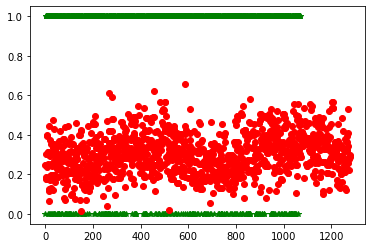

In [225]:
plt.plot(y_train,'g*', y_pred, 'ro')
plt.show()

In [74]:
y_test

,Smoker
0,0
1,1
2,1
3,1
4,1
...,...
263,1
264,1
265,1
266,1


In [ ]:
#Part4: Ridge Rigression

In [77]:
df1 = pd.read_csv(r"datasets\winequality-red.csv")

In [79]:
data1 = pd.DataFrame(df1)

In [80]:
data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [87]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [88]:
df1.shape

(1599, 12)

In [89]:
data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
no_null_df1 = df.dropna()

In [92]:
no_null_df.shape

(1338, 7)

In [112]:
#Normalizing fixed acidity
fixed_acidity_length = df1["fixed acidity"]
min_fixed_acidity_length = fixed_acidity_length.min()
max_fixed_acidity_length = fixed_acidity_length.max()-min_fixed_acidity_length
fixed_acidity_norm = (fixed_acidity_length-np.ones(len(fixed_acidity_length))*min_fixed_acidity_length)/max_fixed_acidity_length

#Normalizing residual sugar
residual_sugar_length = df1["residual sugar"]
min_residual_sugar_length =  residual_sugar_length.min()
max_residual_sugar_length =  residual_sugar_length.max()-min_residual_sugar_length
residual_sugar_norm = (residual_sugar_length-np.ones(len(residual_sugar_length))*min_residual_sugar_length)/max_residual_sugar_length

#Normalizing free sulphur dioxide
fsd_length = df1["free sulfur dioxide"]
min_fsd_length = fsd_length.min()
max_fsd_length = fsd_length.max()-min_fsd_length
fsd_norm = (fsd_length-np.ones(len(fsd_length))*min_fsd_length)/max_fsd_length

#Normalizing total sulfur dioxide
tsd_length = df1["total sulfur dioxide"]
min_tsd_length = tsd_length.min()
max_tsd_length = tsd_length.max()-min_tsd_length
tsd_norm = (tsd_length-np.ones(len(tsd_length))*min_tsd_length)/max_tsd_length

#Normalizing pH
pH_length = df1["pH"]
min_pH_length = pH_length.min()
max_pH_length = pH_length.max()-min_pH_length
pH_norm = (pH_length-np.ones(len(pH_length))*min_pH_length)/max_pH_length

#Normalizing alcohol
alcohol_length = df1["alcohol"]
min_alcohol_length = alcohol_length.min()
max_alcohol_length = alcohol_length.max()-min_alcohol_length
alcohol_norm = (alcohol_length-np.ones(len(alcohol_length))*min_alcohol_length)/max_alcohol_length

#Normalizing quality
quality_length = df1["quality"]
min_quality_length = quality_length.min()
max_quality_length = quality_length.max()-min_quality_length
quality_norm = (quality_length-np.ones(len(quality_length))*min_quality_length)/max_quality_length

In [113]:
quality_norm

0       0.4
1       0.4
2       0.4
3       0.6
4       0.4
       ... 
1594    0.4
1595    0.6
1596    0.6
1597    0.4
1598    0.6
Name: quality, Length: 1599, dtype: float64

In [114]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [143]:
df_winequality = df1.drop(columns = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol', 'quality'])

In [145]:
df_winequality_final = pd.concat([df_winequality, fixed_acidity_norm, residual_sugar_norm, fsd_norm, tsd_norm, pH_norm, alcohol_norm, quality_norm], axis = 1)

In [146]:
df_winequality_final

,volatile acidity,citric acid,chlorides,density,sulphates,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
0,0.700,0.00,0.076,0.99780,0.56,0.247788,0.068493,0.140845,0.098940,0.606299,0.153846,0.4
1,0.880,0.00,0.098,0.99680,0.68,0.283186,0.116438,0.338028,0.215548,0.362205,0.215385,0.4
2,0.760,0.04,0.092,0.99700,0.65,0.283186,0.095890,0.197183,0.169611,0.409449,0.215385,0.4
3,0.280,0.56,0.075,0.99800,0.58,0.584071,0.068493,0.225352,0.190813,0.330709,0.215385,0.6
4,0.700,0.00,0.076,0.99780,0.56,0.247788,0.068493,0.140845,0.098940,0.606299,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,0.99490,0.58,0.141593,0.075342,0.436620,0.134276,0.559055,0.323077,0.4
1595,0.550,0.10,0.062,0.99512,0.76,0.115044,0.089041,0.535211,0.159011,0.614173,0.430769,0.6
1596,0.510,0.13,0.076,0.99574,0.75,0.150442,0.095890,0.394366,0.120141,0.535433,0.400000,0.6
1597,0.645,0.12,0.075,0.99547,0.71,0.115044,0.075342,0.436620,0.134276,0.653543,0.276923,0.4


In [147]:
X_source1 = df_winequality_final.drop(columns = ['alcohol'])

,volatile acidity,citric acid,chlorides,density,sulphates,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,quality
0,0.700,0.00,0.076,0.99780,0.56,0.247788,0.068493,0.140845,0.098940,0.606299,0.4
1,0.880,0.00,0.098,0.99680,0.68,0.283186,0.116438,0.338028,0.215548,0.362205,0.4
2,0.760,0.04,0.092,0.99700,0.65,0.283186,0.095890,0.197183,0.169611,0.409449,0.4
3,0.280,0.56,0.075,0.99800,0.58,0.584071,0.068493,0.225352,0.190813,0.330709,0.6
4,0.700,0.00,0.076,0.99780,0.56,0.247788,0.068493,0.140845,0.098940,0.606299,0.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,0.99490,0.58,0.141593,0.075342,0.436620,0.134276,0.559055,0.4
1595,0.550,0.10,0.062,0.99512,0.76,0.115044,0.089041,0.535211,0.159011,0.614173,0.6
1596,0.510,0.13,0.076,0.99574,0.75,0.150442,0.095890,0.394366,0.120141,0.535433,0.6
1597,0.645,0.12,0.075,0.99547,0.71,0.115044,0.075342,0.436620,0.134276,0.653543,0.4


In [151]:
print(X_source1)
y_source1 = df_winequality_final["alcohol"].to_frame()
print(y_source1)

      volatile acidity  citric acid  chlorides  density  sulphates  \
0                0.700         0.00      0.076  0.99780       0.56   
1                0.880         0.00      0.098  0.99680       0.68   
2                0.760         0.04      0.092  0.99700       0.65   
3                0.280         0.56      0.075  0.99800       0.58   
4                0.700         0.00      0.076  0.99780       0.56   
...                ...          ...        ...      ...        ...   
1594             0.600         0.08      0.090  0.99490       0.58   
1595             0.550         0.10      0.062  0.99512       0.76   
1596             0.510         0.13      0.076  0.99574       0.75   
1597             0.645         0.12      0.075  0.99547       0.71   
1598             0.310         0.47      0.067  0.99549       0.66   

      fixed acidity  residual sugar  free sulfur dioxide  \
0          0.247788        0.068493             0.140845   
1          0.283186        0.116438    

In [158]:
#Capture training values (80% of data set - training)
len_80_percent_winequality = round(len(y_source1)*80/100)
X_train1 = X_source1.head(len_80_percent_winequality)
y_train1 = y_source1.head(len_80_percent_winequality)

In [161]:
#Capture testing values (20% of data set - testing)
X_test1 = X_source1.tail(len(y_source1)-len_80_percent_winequality)
X_test1 = X_test1.reset_index(drop=True) #reset indexing to start at 0
y_test1 = y_source1.tail(len(y_source1)-len_80_percent_winequality)
y_test1 = y_test1.reset_index(drop=True) #reset indexing to start at 0

In [164]:
print("Shape of X Training dataset is:")
print(X_train1.shape)
print(" ")
print("Shape of Y Training dataset is:")
print(y_train1.shape)

Shape of X Training dataset is:
(1279, 11)
 
Shape of Y Training dataset is:
(1279, 1)


In [165]:
print("Shape of X Testing dataset is:")
print(X_test1.shape)
print(" ")
print("Shape of y Testing dataset is:")
print(y_test1.shape)

Shape of X Testing dataset is:
(320, 11)
 
Shape of y Testing dataset is:
(320, 1)


In [166]:
#Converting X training dataset into an array
X1 = X_train1.to_numpy()

#Converting X training dataset into an array
y1 = y_train1.to_numpy()

In [170]:
#Printing X and y array shape
print("X array has shape: ")
print(X1.shape)
print(" ")
print("Y array has shape: ")
print(y1.shape)

X array has shape: 
(1279, 11)
 
Y array has shape: 
(1279, 1)


In [200]:
#Calculations for weights (substituing into formula 𝒘 = (𝑿_trans * 𝑿)inv * X_trans * y
lam = 0.01
I = np.identity(11)
lam_I = lam * I #Product of lamda and I
X1_transpose = X1.transpose()
X1_product = np.dot(X1_transpose,X1) #(X_trans * X)
X1_addition = X1_product + lam_I
X1_inv = np.linalg.inv(X1_addition) #inverse of [(XT * X) + (lamda * I)]
X1_trans_y = np.dot(X1_transpose, y1) #(X_trans * Y)
w1 = np.dot(X1_inv, X1_trans_y)
print("The values of our weights are:")
print(w1)

The values of our weights are:
[[ 0.07584017]
 [ 0.28648583]
 [-0.61604135]
 [-0.08249034]
 [ 0.06362043]
 [-0.19793931]
 [ 0.21766678]
 [ 0.09720396]
 [-0.29710749]
 [ 0.26932664]
 [ 0.4303553 ]]


In [252]:
#Finding the Y predicted values and calculating Mean Squared Error (MSE)
y1_pred = np.dot(X_train1, w1)
yi = np.subtract(y_train1, y1_pred)
Xw = np.dot(X_train1, w1)
y_sub_Xw = np.subtract(yi, Xw)
y_sub_Xw_transpose = np.transpose(y_sub_Xw)
y_sub_Xw_product = np.dot(y_sub_Xw_transpose, y_sub_Xw)
w1_transpose = np.transpose(w1)
w1_final = np.dot(w1_transpose, w1)
lam_product = lam * w1_final
lam_multiply = 0.5 * lam_product
ans = y_sub_Xw_product + lam_multiply
Jw = ans/2
Jw

array([[78.66626323]])

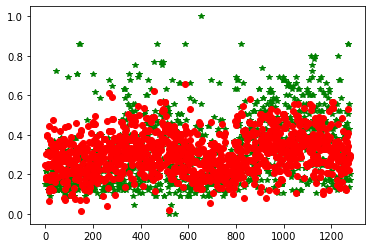

In [250]:
plt.plot(y_train1,'g*', y1_pred, 'ro')
plt.show()
